In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [64]:
df = pd.read_csv("telecom.csv", index_col=None, na_values=[None, "?"])

df.head(5)

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                150001 non-null  int64  
 1   Bearer Id                                 149010 non-null  float64
 2   Start                                     150000 non-null  object 
 3   Start ms                                  150000 non-null  float64
 4   End                                       150000 non-null  object 
 5   End ms                                    150000 non-null  float64
 6   Dur. (ms)                                 150000 non-null  float64
 7   IMSI                                      149431 non-null  float64
 8   MSISDN/Number                             148935 non-null  float64
 9   IMEI                                      149429 non-null  float64
 10  Last Location Name  

In [66]:
df.shape

(150001, 56)

In [ ]:
print(df.isna().sum(), df.info(), df.skew())

"TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "Nb of sec with 6250B < Vol DL < 31250B"

In [67]:
df.isna().sum()

Unnamed: 0                                       0
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)  

In [68]:
df = df.drop(columns=["Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol UL < 37500B", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Avg RTT DL (ms)", "Avg RTT UL (ms)", "TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "Nb of sec with 6250B < Vol DL < 31250B"])
df.head(10)

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [69]:
df.isna().sum()

Unnamed: 0                           0
Bearer Id                          991
Start                                1
Start ms                             1
End                                  1
End ms                               1
Dur. (ms)                            1
IMSI                               570
MSISDN/Number                     1066
IMEI                               572
Last Location Name                1153
Avg Bearer TP DL (kbps)              1
Avg Bearer TP UL (kbps)              1
DL TP < 50 Kbps (%)                754
50 Kbps < DL TP < 250 Kbps (%)     754
250 Kbps < DL TP < 1 Mbps (%)      754
DL TP > 1 Mbps (%)                 754
UL TP < 10 Kbps (%)                792
10 Kbps < UL TP < 50 Kbps (%)      792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP > 300 Kbps (%)               792
Activity Duration DL (ms)            1
Activity Duration UL (ms)            1
Dur. (ms).1                          1
Handset Manufacturer               572
Handset Type             

In [70]:
df.describe()

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000000,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,75000.000000,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,43301.703202,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,37500.000000,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,75000.000000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,112500.000000,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,150000.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [71]:
def percentage_of_missing_data(df):
    total_number_data = np.product(df.shape)
    number_of_missing = df.isnull().sum()
    total_number_missing = number_of_missing.sum()
    print("This Dataset has this", round(((total_number_missing/total_number_data) * 100), 2), "%", "of Missing Data.")

In [72]:
percentage_of_missing_data(df)

This Dataset has this 0.2 % of Missing Data.


In [16]:
percentage_of_missing_data(df["Nb of sec with 37500B < Vol UL"])

This Dataset has this 86.84 % of Missing Data.


In [19]:
percentage_of_missing_data(df.isna())

This Dataset has this 0.0 % of Missing Data.


In [ ]:

"Dur. (ms)"
"IMSI                               41.045956"
"MSISDN/Number                     332.155856"
"IMEI                                1.071470"
"Avg Bearer TP DL (kbps)             2.589437"
"Avg Bearer TP UL (kbps)             4.503413"
"DL TP < 50 Kbps (%)                -2.297803"
"50 Kbps < DL TP < 250 Kbps (%)      3.271453"
"250 Kbps < DL TP < 1 Mbps (%)       4.566158"
"DL TP > 1 Mbps (%)                  5.370351"
"UL TP < 10 Kbps (%)                -8.985016"
"10 Kbps < UL TP < 50 Kbps (%)      10.943888"
"50 Kbps < UL TP < 300 Kbps (%)     21.878495"
"UL TP > 300 Kbps (%)               36.174053"
"Activity Duration DL (ms)           5.872256"
"Activity Duration UL (ms)           7.382557"
"Dur. (ms).1                         3.952609"
"Nb of sec with Vol DL < 6250B       9.042166"
"Nb of sec with Vol UL < 1250B"

In [73]:
df.skew()

C:\Users\Leul\AppData\Local\Temp\ipykernel_80\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0                          0.000000
Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec with Vol DL < 6250B       9.042166
Nb of sec 

In [87]:
def skew_check(data):
    for skew_data in data:
        positive_skew = skew_data > 0.1
        negative_skew = skew_data < 0.1
        print(type(positive_skew))
        if positive_skew == True:
            # columns_to_fill = []
            df_filled_specific = df[columns_to_fill].fillna(df[columns_to_fill].median())


In [ ]:
def calculate_skewness(data):
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=0)  # ddof=0 for population standard deviation
    
    skewness = (1 / n) * ((data - mean) / std).pow(3).sum()
    
    return skewness

def calculate_skewness_values(df):
    skewness_values = {}
    
    for column in df.columns:
        # Calculate skewness for each column
        skewness = calculate_skewness(df[column].dropna())
        skewness_values[column] = skewness
    
    return skewness_values

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Call the function
skewness_values = calculate_skewness_values(df)

# Print the results
for column, skewness in skewness_values.items():
    print(f"Skewness for {column}: {skewness}")

In [ ]:
import pandas as pd

def calculate_skewness(data):
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=0)  # ddof=0 for population standard deviation
    
    skewness = (1 / n) * ((data - mean) / std).pow(3).sum()
    
    return skewness

def calculate_skewness_values(df):
    skewness_values = {}
    
    for column in df.columns:
        # Calculate skewness for each column
        skewness = calculate_skewness(df[column].dropna())
        skewness_values[column] = skewness
        
        # Print both column name and skewness value
        print(f"Skewness for {column}: {skewness}")
    
    return skewness_values

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Call the function
skewness_values = calculate_skewness_values(df)


In [ ]:
# def skew_check1(data):
#     for skew_data in data:
#         positive_skew = skew_data > 0.1
#         negative_skew = skew_data < 0.1
#         print(positive_skew)
#         if positive_skew == True:
columns_to_fill = ["Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B","Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol UL < 37500B", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Avg RTT DL (ms)", "Avg RTT UL (ms)"]

df_filled_specific = df[columns_to_fill].fillna(df[columns_to_fill].median())


In [88]:
skew_check(df.skew())

<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>


C:\Users\Leul\AppData\Local\Temp\ipykernel_80\2709915989.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_check(df.skew())


<Axes: >

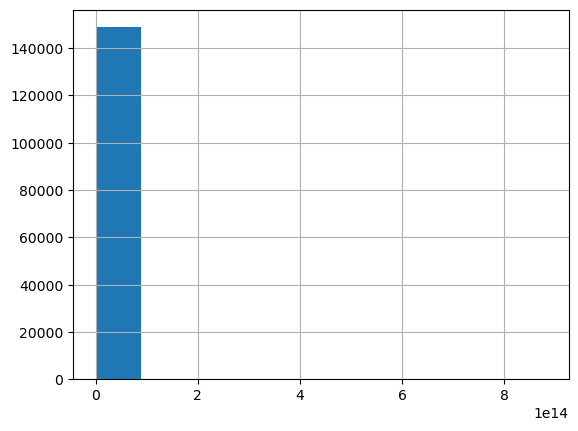

In [23]:
df['MSISDN/Number'].hist()

In [91]:

# for column in df.columns:
#     # Create a histogram for each column
#     plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
#     # Customize plot labels and title
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
    
#     # Show the plot
#     plt.show()
df[column].head(5)

0     4/4/2019 12:01
1     4/9/2019 13:04
2     4/9/2019 17:42
3     4/10/2019 0:31
4    4/12/2019 20:10
Name: Start, dtype: object

<Axes: >

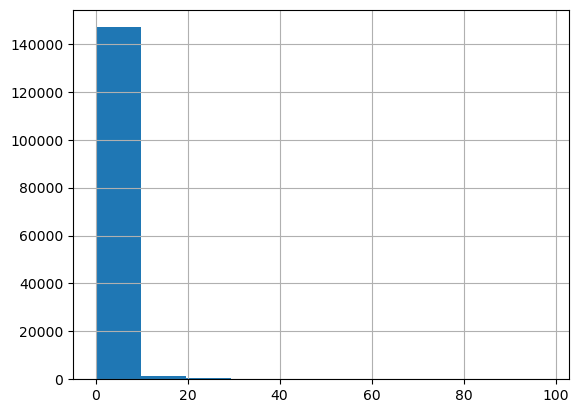

In [30]:
df['10 Kbps < UL TP < 50 Kbps (%)'].hist()

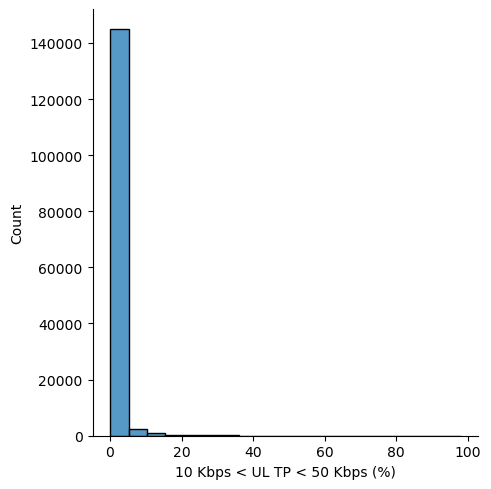

In [31]:
# df['10 Kbps < UL TP < 50 Kbps (%)'].hist()
sns.displot(data=df, x=df['10 Kbps < UL TP < 50 Kbps (%)'])

In [ ]:
# Fill NaN values with the mean of specific columns (e.g., 'column1', 'column2')
columns_to_fill = ["Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol UL < 37500B", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Avg RTT DL (ms)", "Avg RTT UL (ms)"]
df_filled_specific = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [ ]:
["Nb of sec with 125000B < Vol DL",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"HTTP DL (Bytes)",
"HTTP UL (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)"]

In [41]:
# print([df.isna().sum(), df.info(), df.skew()])